Notebook for the one-hot autoencoder

In [1]:
from communications import *
from model import *
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

100%|██████████| 8/8 [37:07<00:00, 278.46s/it]


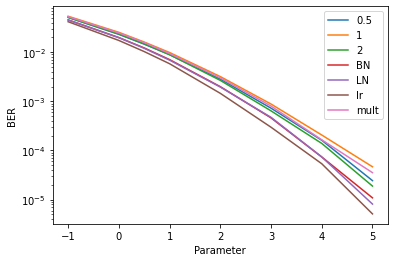

In [3]:
from tensorflow.keras.models import load_model

encoder05,decoder05=load_model('AWGNOHEncoder_05.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_05.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder1,decoder1=load_model('AWGNOHEncoder_1.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_1.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder2,decoder2=load_model('AWGNOHEncoder_2.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_2.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder1_BN,decoder1_BN=load_model('AWGNOHEncoder_1_BN.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_1_BN.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder1_LN,decoder1_LN=load_model('AWGNOHEncoder_1_LN.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_1_LN.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder1_BN_lr,decoder1_BN_lr=load_model('AWGNOHEncoder_BN_lr.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_BN_lr.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder_mult,decoder_mult=load_model('AWGNOHEncoder_mult.h5',custom_objects={'multi_AWGN':multi_AWGN}),load_model('AWGNOHDecoder_mult.h5',custom_objects={'multi_AWGN':multi_AWGN},compile=False)


encoder_list,decoder_list=[encoder05,encoder1,encoder2,encoder1_BN,encoder1_LN,encoder1_BN_lr,encoder_mult],[decoder05,decoder1,decoder2,decoder1_BN,decoder1_LN,decoder1_BN_lr,decoder_mult]
multBER(encoder_list,decoder_list,'AWGN',[-1,0,0.5,1,2,3,4,5],save_params=True,params_name=['params_05_1_2.npy'],save_ber=True,ber_name=['ber_05.npy','ber_1.npy','ber_2.npy','ber_1_BN.npy','ber_1_LN.npy','ber_1_BN_lr.npy','ber_mult.npy'],plot_ber=True,points_per_value=[10**6],plot_legend=['0.5','1','2','BN','LN','lr','mult'],
        save_fig=True,fig_name='ALLModelsBER.pdf')

100%|██████████| 7/7 [37:56<00:00, 325.22s/it]


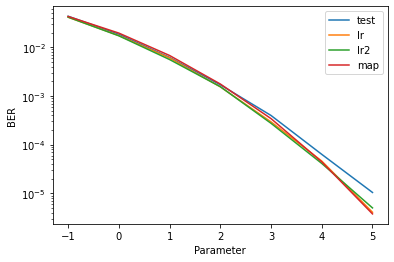

In [3]:
from tensorflow.keras.models import load_model

encoder_test,decoder_test=load_model('AWGNOHEncoder_test3.h5',custom_objects={'AWGN':AWGN,'Mish':Mish}),load_model('AWGNOHDecoder_test3.h5',custom_objects={'AWGN':AWGN,'Mish':Mish},compile=False)
encoder1_BN_lr,decoder1_BN_lr=load_model('AWGNOHEncoder_BN_lr.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_BN_lr.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder1_BN_lr2,decoder1_BN_lr2=load_model('AWGNOHEncoder_BN_lr2.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_BN_lr2.h5',custom_objects={'AWGN':AWGN},compile=False)


encoder_list,decoder_list=[encoder_test,encoder1_BN_lr,encoder1_BN_lr2],[decoder_test,decoder1_BN_lr,decoder1_BN_lr2]
multBER(encoder_list,decoder_list,'AWGN',[-1,0,1,2,3,4,5],do_polar_MAP=True,save_params=True,params_name=['params_map2.npy'],save_ber=True,ber_name=['ber_test_map2.npy','ber_1_lr_map2.npy','ber_1_lr2_map2.npy','ber_map2.npy'],plot_ber=True,points_per_value=[100000,100000,100000,100000,1000000,1500000,2000000],plot_legend=['test','lr','lr2','map'],
        save_fig=True,fig_name='ALLModelsBERwmap2.pdf')

100%|██████████| 5/5 [02:26<00:00, 29.34s/it]


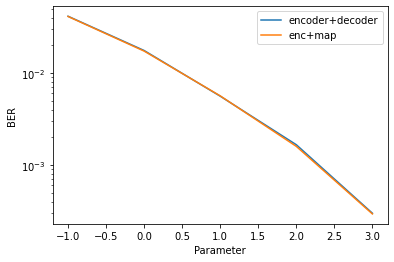

In [3]:
from tensorflow.keras.models import load_model

encoder1,decoder1=load_model('AWGNOHEncoder_BN_lr.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_BN_lr.h5',custom_objects={'AWGN':AWGN},compile=False)


encoder_list,decoder_list=[encoder1],[decoder1]
#encoder_list,decoder_list=[encoder1,encoder2],[decoder1,decoder2]
multBER(encoder_list,decoder_list,'AWGN',[-1,0,1,2,3],do_polar_MAP=False,do_enc_MAP=True,
        save_params=False,params_name=['params_map2.npy'],
        save_ber=False,ber_name=['ber_test_map2.npy','ber_1_lr_map2.npy','ber_1_lr2_map2.npy','ber_map2.npy'],
        plot_ber=True,points_per_value=[100000,100000,100000,100000,1000000],plot_legend=['encoder+decoder','enc+map'],
        save_fig=False,fig_name='ALLModelsBERwmap2.pdf')

In [4]:
np.round([-0.9999,0.999])

array([-1.,  1.])